In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
!pip install pandas_ta
!pip install mpl_finance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import pandas_ta
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [ ]:
# Getting real-time cryptocurrency data (bitcoin)
data = pd.read_csv('/content/drive/MyDrive/datasets/BTC-USD.csv', date_parser = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2615,2021-11-14,64455.371094,65495.179688,63647.808594,65466.839844,65466.839844,2.512209e+10
2616,2021-11-15,65521.289063,66281.570313,63548.144531,63557.871094,63557.871094,3.055876e+10
2617,2021-11-16,63721.195313,63721.195313,59016.335938,60161.246094,60161.246094,4.684434e+10
2618,2021-11-17,60139.621094,60823.609375,58515.410156,60368.011719,60368.011719,3.917839e+10



# **Bitcoin Price Prediction Using Recurrent Neural Networks and LSTM**

**What is sequential data?** 
* Whenever the points in the dataset are dependent on the other points in the dataset the data is said to be Sequential data.  
* A common example of this is a Timeseries such as a stock price or a sensor data where each point represents an observation at a certain point in time.

**Recurrent neural networks (RNN)**
* Recurrent neural networks (RNN) are the state-of-the-art algorithm for sequential data and are used by Apple’s Siri and Google’s voice search. 
* It is an algorithm that remembers its input due to its internal memory, which makes the algorithm perfectly suited for solving machine learning problems involving sequential data. 
* The algorithm performs very well for sequential data such as time series, speech, text, financial data, audio, video, weather, and more.
* In an RNN, the information goes through a cycle. When making a decision, it considers the current input and also what it has learned from the inputs it has received previously.

**Long Short-Term Memory (LSTM)**
* Long short-term memory networks are an extension of recurrent neural networks, which basically extend the memory.

* LSTMs enable RNNs to remember inputs over a long period of time because LSTMs contain information in a memory, much like the memory of a computer.


In [ ]:
# Getting real-time cryptocurrency data (bitcoin)
data = pd.read_csv('/content/drive/MyDrive/datasets/BTC-USD.csv', date_parser = True)

data_training = data[data['Date'] < '2020-01-01'].copy()
data_test = data[data['Date'] > '2020-01-01'].copy()
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)

# normalize its values to change the values of numeric columns in the data set to a common scale, without distorting differences in the ranges of values.
# MinMaxScaler is used to normalize the data
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)

X_train = [] 
Y_train = []
for i in range(60, training_data.shape[0]):
  X_train.append(training_data[i-60:i])
  Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
training_data.shape[0]

1932

 Predict the price of cryptocurrency using LSTM neural network

Epoch 1/20
34/34 [==============================] - 14s 259ms/step - loss: 0.0189 - val_loss: 0.0144
Epoch 2/20
34/34 [==============================] - 8s 235ms/step - loss: 0.0048 - val_loss: 0.0073
Epoch 3/20
34/34 [==============================] - 8s 237ms/step - loss: 0.0046 - val_loss: 0.0073
Epoch 4/20
34/34 [==============================] - 8s 238ms/step - loss: 0.0038 - val_loss: 0.0029
Epoch 5/20
34/34 [==============================] - 8s 241ms/step - loss: 0.0038 - val_loss: 0.0027
Epoch 6/20
34/34 [==============================] - 8s 237ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 7/20
34/34 [==============================] - 8s 235ms/step - loss: 0.0035 - val_loss: 0.0027
Epoch 8/20
34/34 [==============================] - 8s 234ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 9/20
34/34 [==============================] - 8s 236ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 10/20
34/34 [==============================] - 8s 235ms/step - loss: 0.0033 - val_loss: 0.003

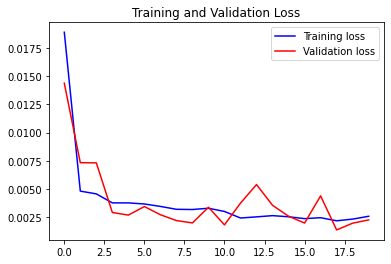

In [ ]:
#Initialize the RNN
model = Sequential() 
# Long Short-Term Memory layer
# unit -> dimension of the inner cells in LSTM
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
# The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
# create fully connected layers -> every output depends on every input
model.add(Dense(units =1))

# Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.1)

loss = history.history['loss'] # training loss indicates how well the model is fitting the training data
val_loss = history.history['val_loss'] # validation loss indicates how well the model fits new data
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

Test Dataset

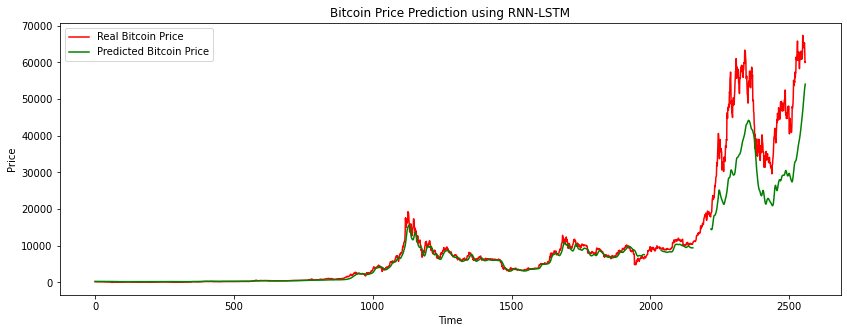

In [ ]:
part_60_days = data_training
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)

inputs = scaler.transform(df)
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
  X_test.append(inputs[i-60:i]) 
  Y_test.append(inputs[i, 0])

X_test, Y_test = np.array(X_test), np.array(Y_test) 

Y_pred = model.predict(X_test) 
scale = 1/scaler.scale_[0]
Y_test = Y_test*scale
Y_pred = Y_pred*scale

plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

SVR (support vector regression)

svm confidence:  0.906856070903834


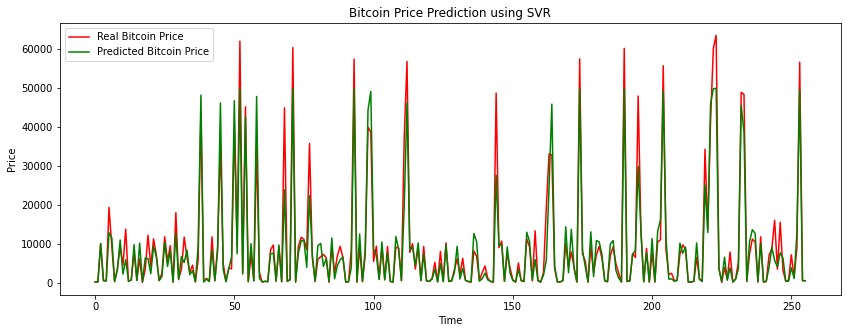

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/datasets/BTC-USD.csv')
df1.dropna(inplace=True)
# data frame is having Date and Stock Prices
df = df1[['Adj Close']]

#Create one more column Prediction which is having stock values 15 days in advance, by shifting 15 rows up.
df['Prediction'] = df[['Adj Close']].shift(-60)

#Create a data set X and convert it into numpy array , which will be having actual values
X = np.array(df.drop(['Prediction'],1))
#Remove the last 15 rows
X = X[:-60]

# Create a dataset y which will be having Predicted values and convert into numpy array
y = np.array(df['Prediction'])
# Remove Last 15 rows
y = y[:-60]

scaler = StandardScaler()
X = scaler.fit_transform(X) 

# Split the data into train and test with 90 & 10 % respectively
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Machine learning LR model based on the current and 15 days later values and predict the values 15 days in advance.
# radial basis function kernel, or RBF kernel
# C : Regularization parameter
# gamma : Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
svr = SVR(kernel='rbf', C=1000, gamma=0.1)

# Train the model 
svr.fit(x_train, y_train)

# The best possible score is 1.0
svm_confidence = svr.score(x_test, y_test)
# Returns the coefficient of determination R² of the prediction.
print('svm confidence: ', svm_confidence)

y_pred = svr.predict(x_test)

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using SVR')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

SVM (Support Vector Machines)

Accuracy : 0.5384615384615384
Precision : 0.5488474204171241
Recall : 0.8741258741258742
F Measure : 0.6743088334457181
Confusion Matrix :
[[ 127  822]
 [ 144 1000]]
ROC Curve :


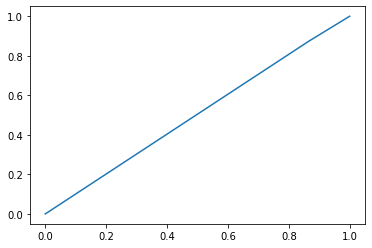

Area Under The Curve : 0.5039754765782163


In [ ]:
def EvaluationMeasures(YTest,yHat):
    print(f'Accuracy : {accuracy_score(YTest,yHat)}')
    print(f'Precision : {precision_score(YTest,yHat)}')
    print(f'Recall : {recall_score(YTest,yHat)}')
    print(f'F Measure : {f1_score(YTest,yHat)}')
    print(f'Confusion Matrix :\n{confusion_matrix(YTest,yHat)}')
    fpr,tpr,threshold=roc_curve(YTest,yHat)
    print("ROC Curve :")
    plt.plot(fpr,tpr)
    plt.show()
    print(f'Area Under The Curve : {roc_auc_score(YTest,yHat)}')

df = pd.read_csv('/content/drive/MyDrive/datasets/BTC-USD.csv')
df.dropna(inplace=True)
# Changes The Date column as index columns (data needs to be processed)
df.index = pd.to_datetime(df['Date'])
# drop The original date column
df = df.drop(['Date'], axis='columns')

# Create predictor variables
# 'Open – Close' and 'High – Low' are indicators based on which the algorithm will predict tomorrow’s trend
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
  
# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
# Target variables
# if tomorrow’s price > today's price
# buy the particular Stock
# else
# no
# 1 for a buy and 0 for no
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

scaler = StandardScaler()
X = scaler.fit_transform(X) 

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0)
grid.fit(X_train, y_train)

# create classifier model using fit() method on the training dataset
cls = SVC(**grid.best_params_).fit(X_train, y_train)
y_pred = cls.predict(X_test)

EvaluationMeasures(y_test, y_pred)

Linear Regression

Model Coefficients: [[0.98219327]]
Mean Absolute Error: 472.7162238200966


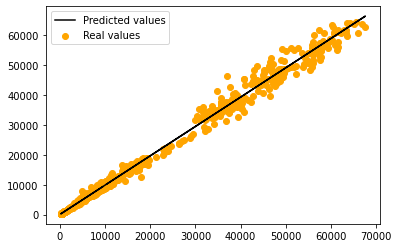

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/BTC-USD.csv')

# convert 'Date' column to DatetimeIndex and the ‘Adj Close’ will be the only numerical values we keep
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
# Keep only the 'Adj Close' Value
df = df[['Adj Close']]
df = df.rename(columns={"Adj Close": "adj_close"})

# Add EMA (Technical Indicators) to dataframe representing the exponential moving average calculated over a 10-day period
df.ta.ema(close='adj_close', length=10, append=True)
df.dropna(inplace=True)

# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df[['adj_close']], df[['EMA_10']], test_size=0.2)

# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# generates coefficients for each feature during training and returns these values as an array
print("Model Coefficients:", model.coef_)
# sum of the absolute error for all observed values divided by the total number of observations
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

plt.scatter(X_train, y_train, color = 'orange', label='Real values')
plt.plot(X_train, model.predict(X_train), color = 'black', label='Predicted values')
plt.legend()
plt.show()

 Random Forest

accuracy score:  0.502627806975633
Accuracy : 0.502627806975633
Precision : 0.5449490268767377
Recall : 0.5166959578207382
F Measure : 0.5304465493910692
Confusion Matrix :
[[464 491]
 [550 588]]
ROC Curve :


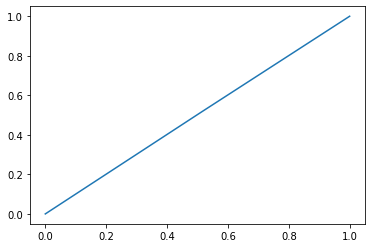

Area Under The Curve : 0.501279916083144


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/BTC-USD.csv')

# Features construction 
data['Open-Close'] = data.Open - data.Close
data['High-Low'] = data.High - data.Low
data.dropna(inplace=True)

X = data[['Open-Close', 'High-Low']]
y = np.where(data['Adj Close'].shift(-1) > data['Adj Close'], 1, 0)

# Splitiing the X and y into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

clf = RandomForestClassifier()

# Create the model on train dataset
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('accuracy score: ', accuracy_score(y_test, y_pred))
EvaluationMeasures(y_test, y_pred)

EDA (Exploratory data analysis)

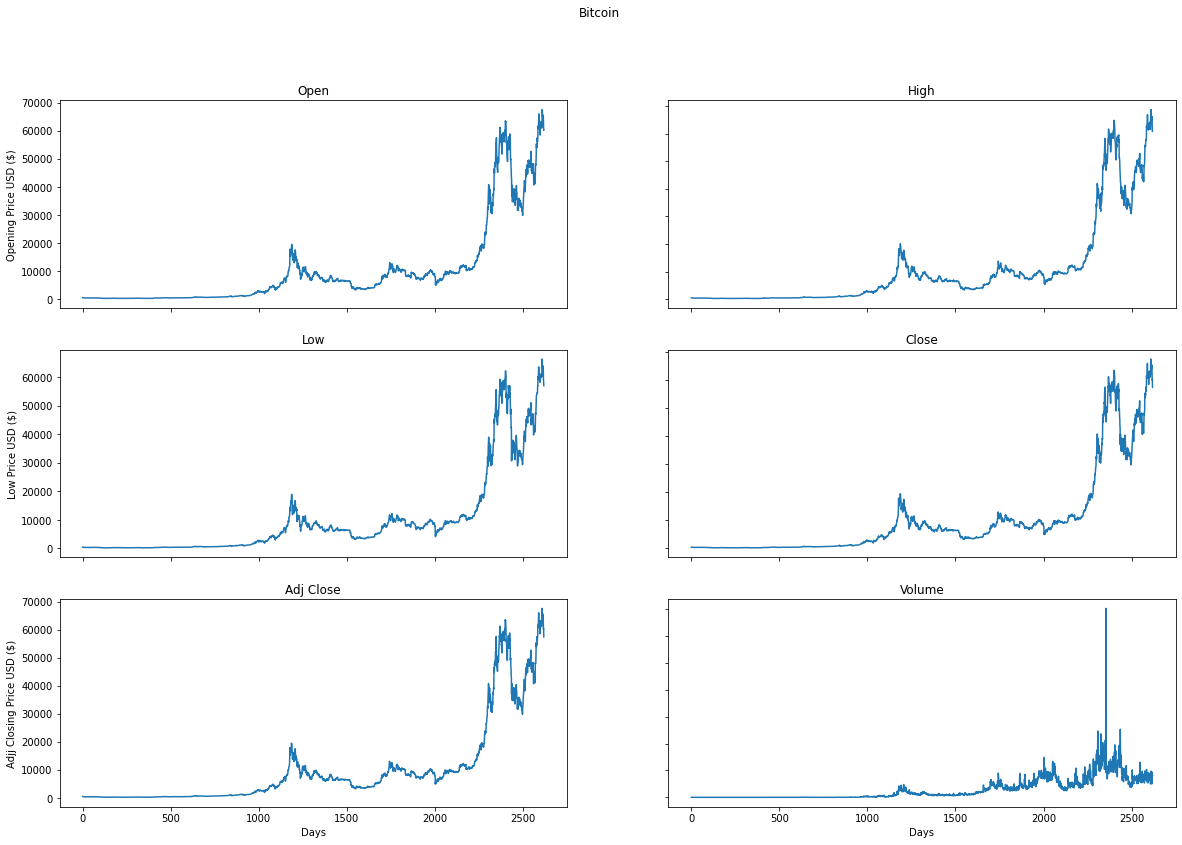

In [ ]:
# Using data from Apple's stock.
df = pd.read_csv('/content/drive/MyDrive/datasets/BTC-USD.csv') 

# Visualizing the opening prices of the data.
fig, axs = plt.subplots(3, 2, figsize=(20,13))
axs[0, 0].set_title('Open')
axs[0, 0].set(xlabel='Days', ylabel='Opening Price USD ($)')
axs[0, 0].plot(df['Open'])

axs[0, 1].set_title('High')
axs[0, 1].set(xlabel='Days', ylabel='High Price USD ($)')
axs[0, 1].plot(df['High'])

axs[1, 0].set_title('Low')
axs[1, 0].set(xlabel='Days', ylabel='Low Price USD ($)')
axs[1, 0].plot(df['Low'])

axs[1, 1].set_title('Close')
axs[1, 1].set(xlabel='Days', ylabel='Closing Price USD ($)')
axs[1, 1].plot(df['Close'])

axs[2, 0].set_title('Adj Close')
axs[2, 0].set(xlabel='Days', ylabel='Adjj Closing Price USD ($)')
axs[2, 0].plot(df['Adj Close'])

axs[2, 1].set_title('Volume')
axs[2, 1].set(xlabel='Days', ylabel='Closing Price USD ($)')
axs[2, 1].plot(df['Volume'])

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.suptitle("Bitcoin")
plt.show()

Decision Tree

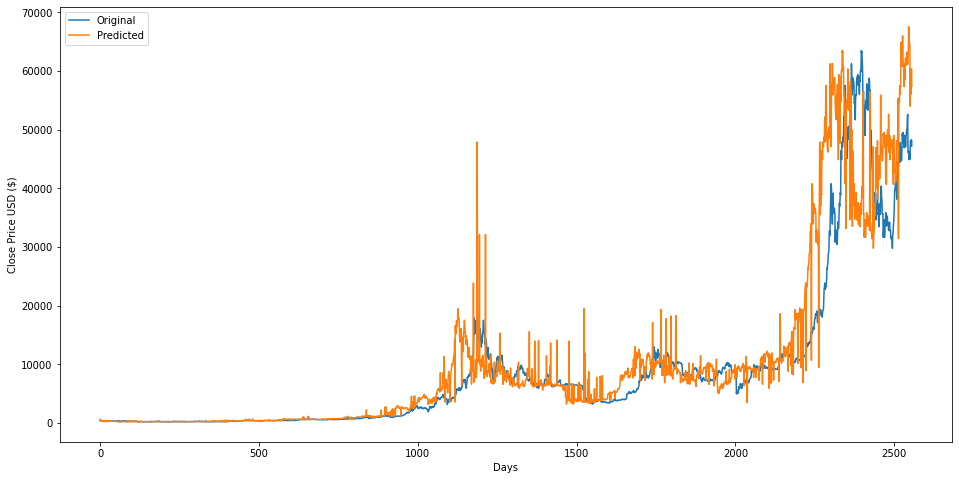

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/BTC-USD.csv') 
df.dropna(inplace=True)

df2 = df['Adj Close']
df2 = pd.DataFrame(df2)
# Prediction 100 days into the future
future_days = 60
df2['Prediction'] = df2['Adj Close'].shift(-future_days)
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
y = np.array(df2['Prediction'])[:-future_days]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

tree = DecisionTreeRegressor().fit(x_train, y_train)

predictions = tree.predict(X)

plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(X)
plt.plot(predictions)
plt.legend(['Original', 'Predicted'])
plt.show()

#print(tree.get_depth())

# Plot decision tree
#plot_tree(tree)
#plt.show()

Candlestick Chart

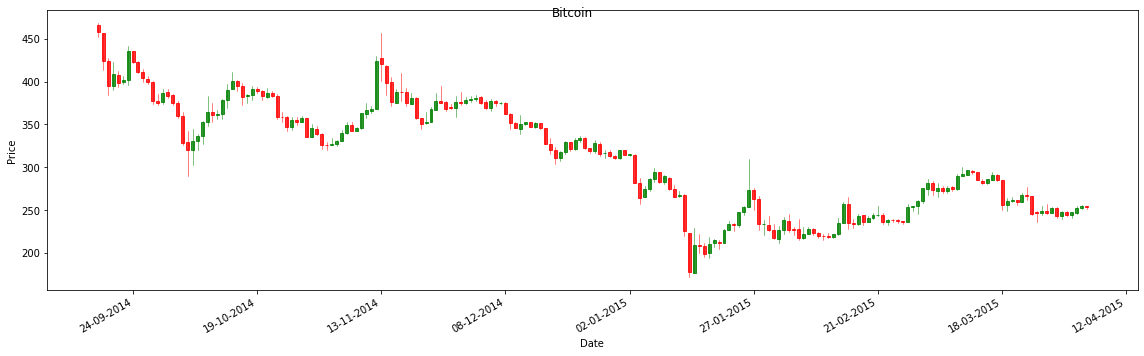

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/BTC-USD.csv')
data = data.iloc[0:200, :]
ohlc = data.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots(figsize=(16,5))

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Bitcoin')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()